### Import Library

In [244]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, make_scorer, f1_score

In [2]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
warnings.filterwarnings("ignore", category=FutureWarning)

### Eskplorasi Data

In [3]:
dataset_churn = pd.read_csv('telco_churn_sample.csv')

In [5]:
dataset_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSISDN             5000 non-null   int64  
 1   los                5000 non-null   int64  
 2   voice_rev          5000 non-null   float64
 3   voice_trx          5000 non-null   int64  
 4   voice_mou          5000 non-null   int64  
 5   voice_dou          5000 non-null   int64  
 6   sms_rev            5000 non-null   int64  
 7   sms_trx            5000 non-null   int64  
 8   sms_dou            5000 non-null   int64  
 9   broadband_rev      5000 non-null   float64
 10  broadband_usg      5000 non-null   float64
 11  broadband_dou      5000 non-null   int64  
 12  voice_package_rev  5000 non-null   int64  
 13  voice_package_trx  5000 non-null   int64  
 14  voice_package_dou  5000 non-null   int64  
 15  churn              5000 non-null   int64  
dtypes: float64(3), int64(13)

In [4]:
dataset_churn.loc[:, 'churn'] = dataset_churn['churn'].astype('category')
dataset_klasifikasi = dataset_churn.drop('MSISDN', axis=1)

In [6]:
dataset_klasifikasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   los                5000 non-null   int64   
 1   voice_rev          5000 non-null   float64 
 2   voice_trx          5000 non-null   int64   
 3   voice_mou          5000 non-null   int64   
 4   voice_dou          5000 non-null   int64   
 5   sms_rev            5000 non-null   int64   
 6   sms_trx            5000 non-null   int64   
 7   sms_dou            5000 non-null   int64   
 8   broadband_rev      5000 non-null   float64 
 9   broadband_usg      5000 non-null   float64 
 10  broadband_dou      5000 non-null   int64   
 11  voice_package_rev  5000 non-null   int64   
 12  voice_package_trx  5000 non-null   int64   
 13  voice_package_dou  5000 non-null   int64   
 14  churn              5000 non-null   category
dtypes: category(1), float64(3), int64(11)
memory usage: 552

In [8]:
dataset_klasifikasi.describe()

,los,voice_rev,voice_trx,voice_mou,voice_dou,sms_rev,sms_trx,sms_dou,broadband_rev,broadband_usg,broadband_dou,voice_package_rev,voice_package_trx,voice_package_dou
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,1223.959600,7961.593436,28.565600,117.765400,3.941000,4550.65800,35.258800,3.914800,3952.536834,104.873682,1.207000,12064.802400,3.201000,2.62520
std,978.522977,13940.009989,39.361066,211.786904,2.397221,6907.20604,82.391623,2.504635,16562.074808,497.162001,2.295736,11291.164655,2.875805,1.87676
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000
25%,341.000000,435.000000,4.000000,4.000000,2.000000,415.00000,3.000000,2.000000,0.000000,0.000000,0.000000,4350.000000,1.000000,1.00000
50%,956.000000,3663.500000,15.000000,44.000000,4.000000,1980.00000,12.000000,4.000000,0.000000,0.000000,0.000000,8200.000000,2.000000,2.00000
75%,2097.250000,9954.750000,37.000000,137.000000,6.000000,5746.25000,34.000000,6.000000,0.000000,0.012398,1.000000,16475.000000,4.000000,4.00000
max,3220.000000,397101.000000,507.000000,3477.000000,7.000000,72430.00000,1449.000000,7.000000,424720.000000,9882.606352,7.000000,88000.000000,24.000000,7.00000


In [32]:
dataset_klasifikasi

,los,voice_rev,voice_trx,voice_mou,voice_dou,sms_rev,sms_trx,sms_dou,broadband_rev,broadband_usg,broadband_dou,voice_package_rev,voice_package_trx,voice_package_dou,churn
0,534,5860.0,57,251,7,3465,16,5,35000.0,1713.202771,6,34200,8,6,0
1,589,0.0,0,0,0,0,0,0,0.0,0.000000,0,8350,2,2,1
2,1223,3744.0,6,5,2,2475,13,5,0.0,0.000000,0,8200,2,2,0
3,1221,231.0,52,188,6,0,2,2,0.0,341.692641,7,7950,2,2,0
4,60,12073.0,36,588,6,2100,20,5,0.0,0.000000,0,26600,6,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1578,55002.0,122,192,7,1890,28,7,0.0,0.000000,0,20750,5,4,0
4996,677,4926.0,113,497,6,1080,9,3,25781.0,105.070701,6,20500,5,3,0
4997,1425,15293.0,18,19,4,285,1,1,0.0,0.000000,0,29450,7,5,0
4998,1764,13018.0,273,2149,7,22250,259,7,0.0,0.000000,0,32310,9,5,0


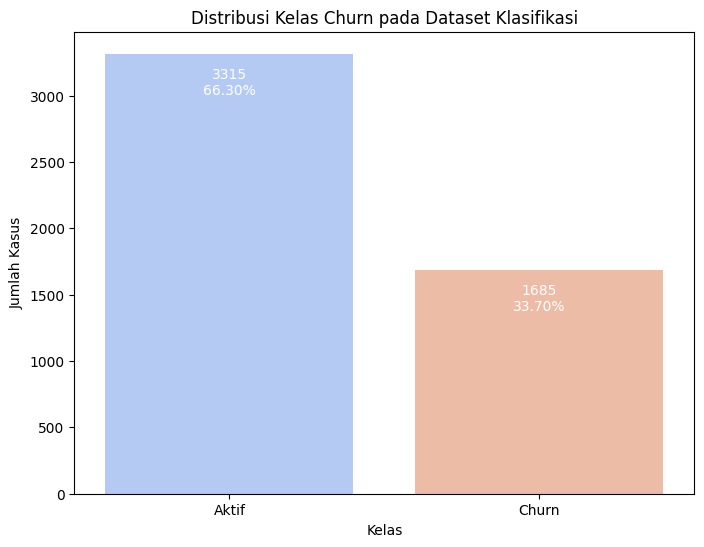

In [29]:
class_label = dataset_klasifikasi['churn'].value_counts()
labels = ['Aktif', 'Churn']

jumlah_kasus = class_label.values
total_kasus = jumlah_kasus.sum()

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=labels, y=jumlah_kasus, palette='coolwarm')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Kasus')
plt.title('Distribusi Kelas Churn pada Dataset Klasifikasi')

for i, v in enumerate(jumlah_kasus):
    persentase = (v / total_kasus) * 100
    ax.text(i, v-100, f'{v}\n{persentase:.2f}%', ha='center', va='top', color='white')

plt.show()

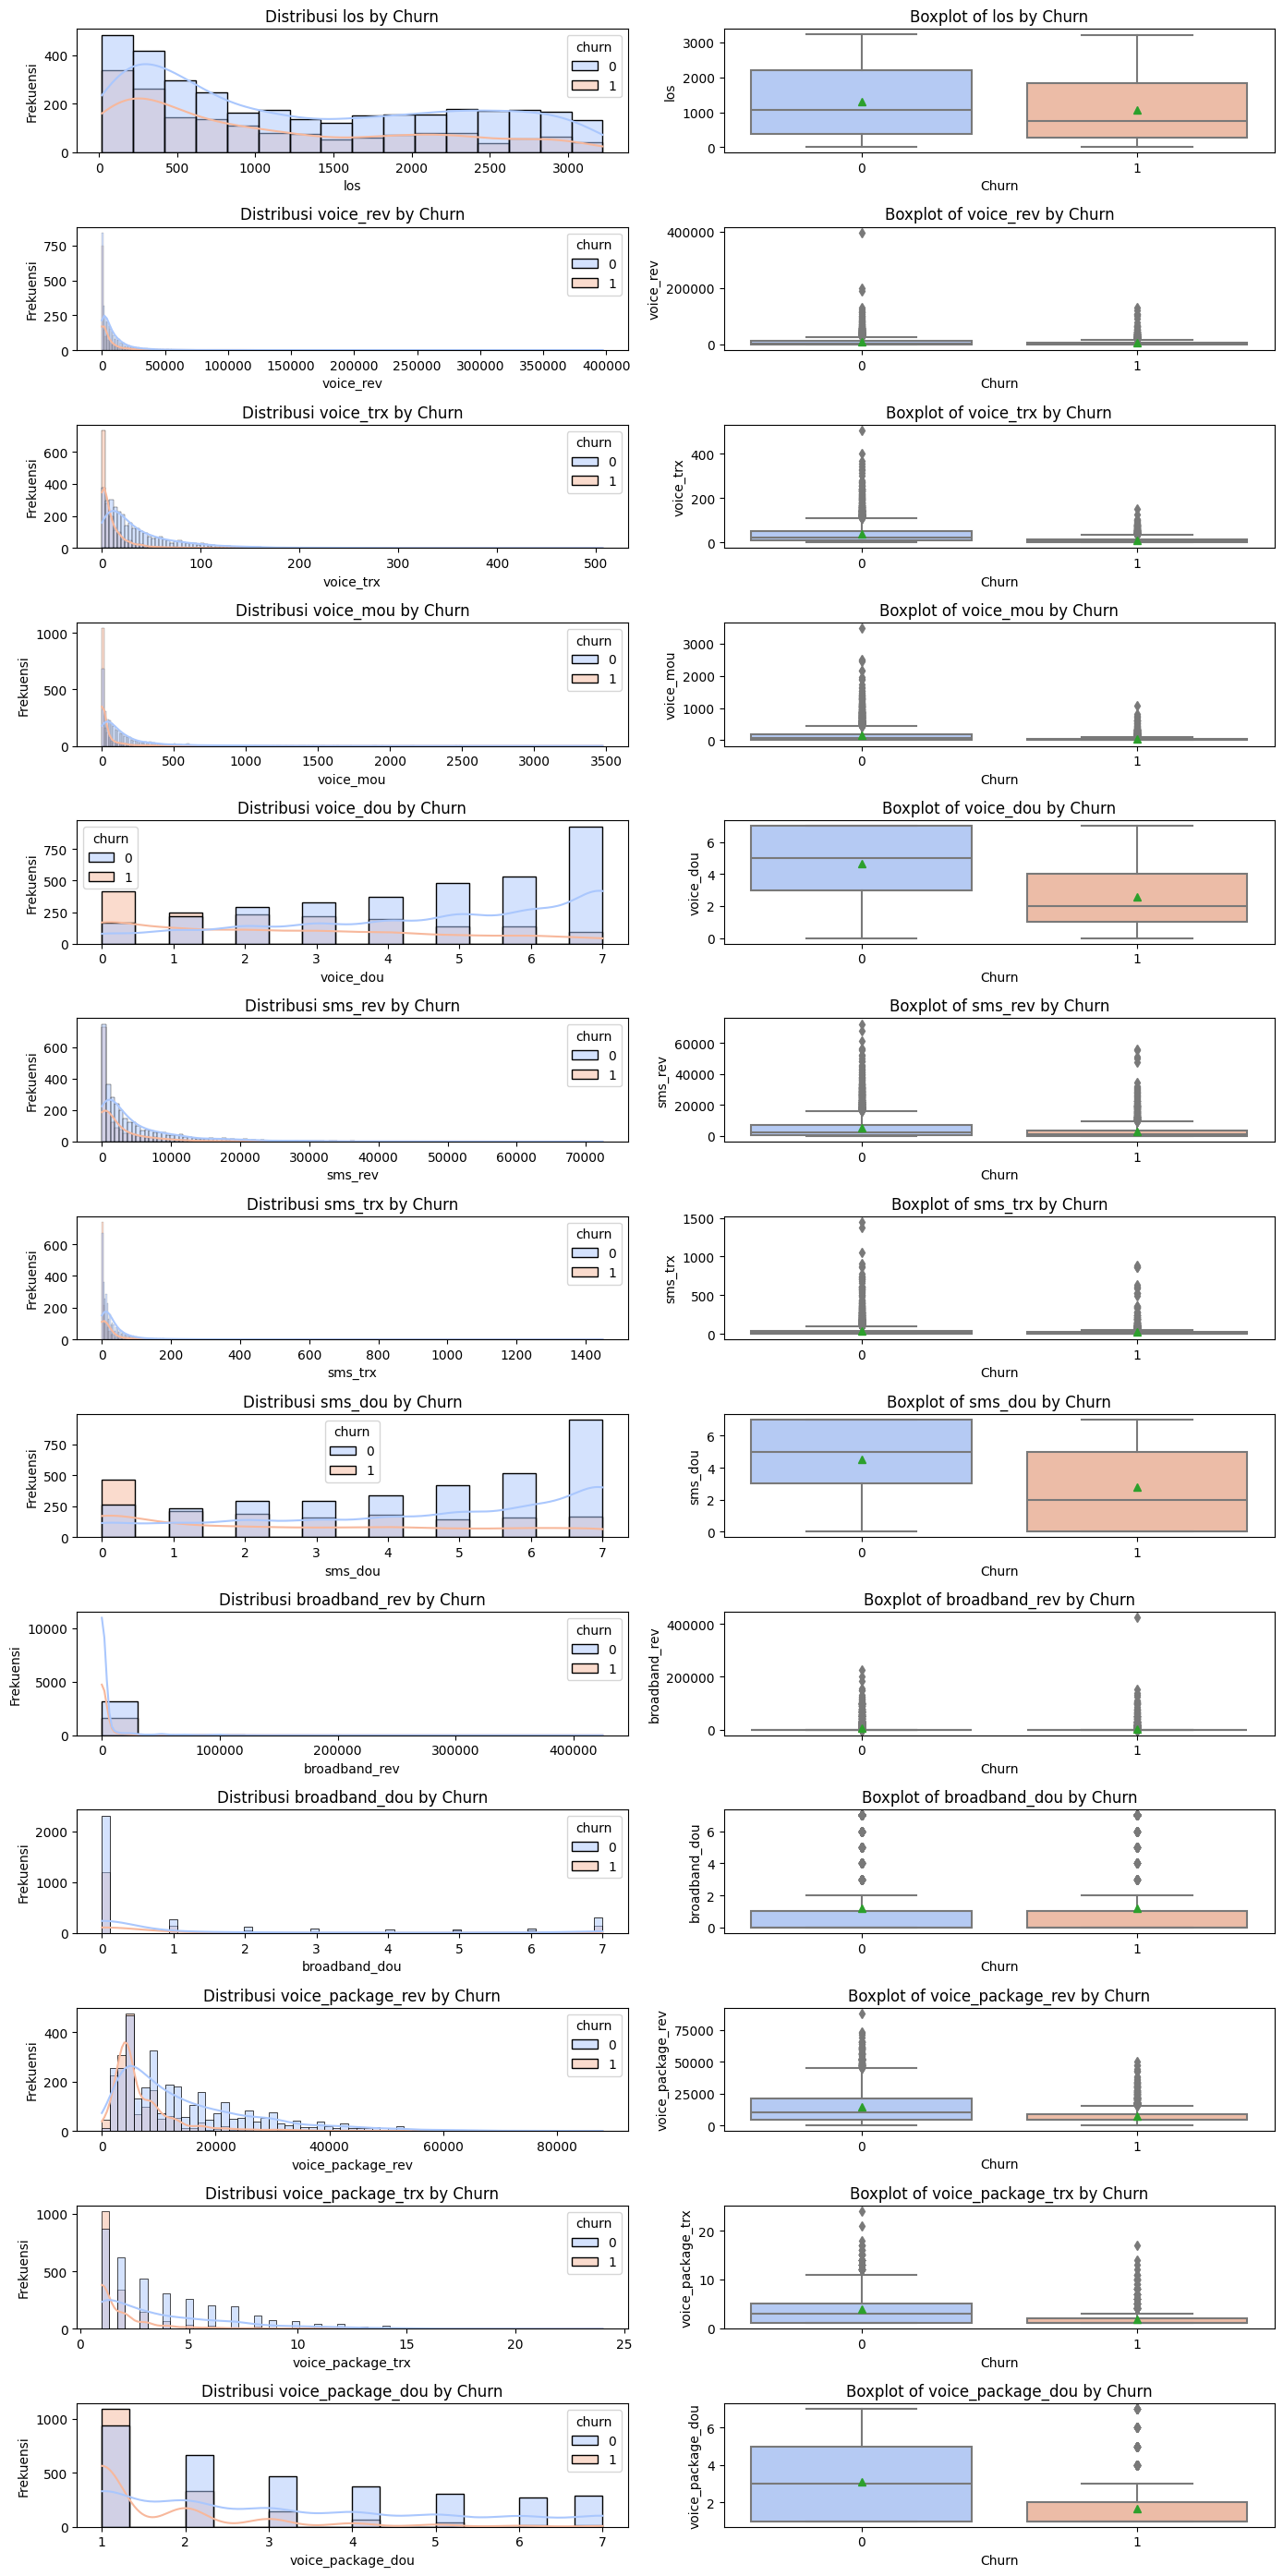

In [11]:
columns_to_visualize = dataset_klasifikasi.drop(['broadband_usg', 'churn'], axis=1).columns

fig, axes = plt.subplots(nrows=len(columns_to_visualize), ncols=2, figsize=(14, 28))

for i, column in enumerate(columns_to_visualize):
    
    # Histogram
    sns.histplot(data=dataset_klasifikasi, x=column, hue='churn', palette='coolwarm', kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribusi {column} by Churn')
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Frekuensi')

    # Boxplot
    sns.boxplot(data=dataset_klasifikasi, x='churn', y=column, showmeans=True, palette='coolwarm', ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {column} by Churn')
    axes[i, 1].set_xlabel('Churn')
    axes[i, 1].set_ylabel(column)

plt.tight_layout()
plt.show()


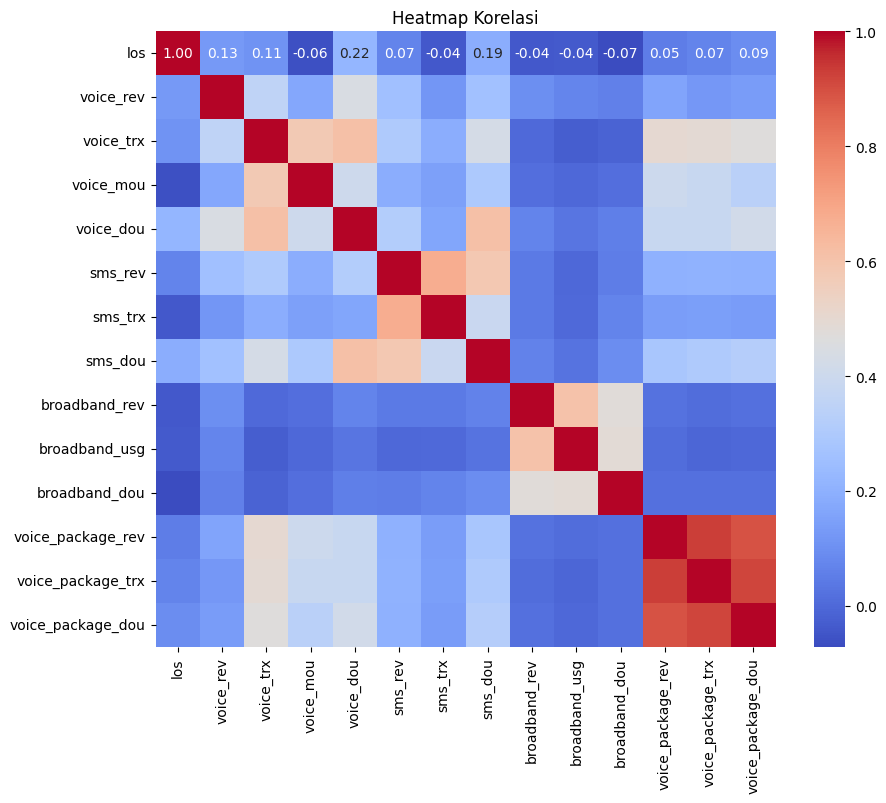

In [25]:
correlation_matrix = dataset_klasifikasi.drop('churn', axis=1).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

In [19]:
# Menggunakan logaritma alami pada kolom 'voice_package_rev', 'voice_package_trx', dan 'voice_package_dou'
dataset_klasifikasi.loc[:, 'voice_package_rev'] = np.log1p(dataset_klasifikasi['voice_package_rev'])
dataset_klasifikasi.loc[:, 'voice_package_trx'] = np.log1p(dataset_klasifikasi['voice_package_trx'])
dataset_klasifikasi.loc[:, 'voice_package_dou'] = np.log1p(dataset_klasifikasi['voice_package_dou'])

# Cek hasil perubahan
print(dataset_klasifikasi[['voice_package_rev', 'voice_package_trx', 'voice_package_dou']].describe())


       voice_package_rev  voice_package_trx  voice_package_dou
count        5000.000000        5000.000000        5000.000000
mean            8.983709           1.255300           1.168462
std             1.115652           0.569772           0.476105
min             0.000000           0.693147           0.693147
25%             8.378161           0.693147           0.693147
50%             9.012011           1.098612           1.098612
75%             9.709657           1.609438           1.609438
max            11.385103           3.218876           2.079442


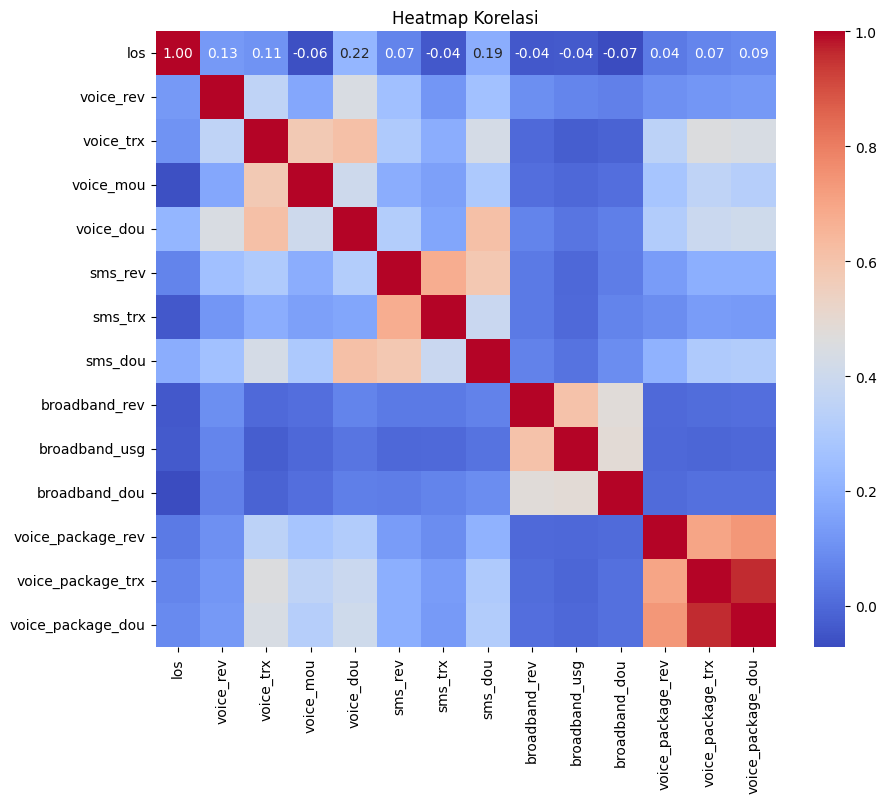

In [20]:
correlation_matrix = dataset_klasifikasi.drop('churn', axis=1).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Pilih hanya kolom-kolom yang akan dihitung VIF-nya
selected_columns = ['voice_package_rev', 'voice_package_trx', 'voice_package_dou']

# Hitung VIF untuk setiap variabel
vif = pd.DataFrame()
vif["Variable"] = selected_columns
vif["VIF"] = [variance_inflation_factor(dataset_klasifikasi[selected_columns].values, i) for i in range(len(selected_columns))]

# Tampilkan hasil VIF
print(vif)

            Variable        VIF
0  voice_package_rev  11.430474
1  voice_package_trx  73.225396
2  voice_package_dou  94.467322


In [16]:
pca = PCA(n_components=14)

pca.fit(dataset_klasifikasi)
pca_components = pca.transform(dataset_klasifikasi)

new_dataset = pd.DataFrame(pca_components, columns=['pca_component_1', 'pca_component_2', 'pca_component_3', 'pca_component_4', 'pca_component_5', 'pca_component_6', 'pca_component_7', 'pca_component_8', 'pca_component_9', 'pca_component_10', 'pca_component_11', 'pca_component_12', 'pca_component_13', 'pca_component_14'])
new_dataset['churn'] = dataset_klasifikasi['churn']

new_dataset.to_csv('dataset_pca.csv', index=False)

In [17]:
dataset_churn_pca = pd.read_csv('dataset_pca.csv')
dataset_churn_pca.describe()

,pca_component_1,pca_component_2,pca_component_3,pca_component_4,pca_component_5,pca_component_6,pca_component_7,pca_component_8,pca_component_9,pca_component_10,pca_component_11,pca_component_12,pca_component_13,pca_component_14,churn
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5000.000000
mean,-2.095476e-13,-2.328306e-14,3.608875e-13,-2.619345e-13,-1.044100e-13,1.127773e-14,8.913048e-15,2.455636e-15,1.364242e-16,-1.008971e-16,6.536993e-17,-9.947598e-17,6.892265e-17,-9.094947e-17,0.337000
std,1.678268e+04,1.415936e+04,1.094464e+04,6.482138e+03,9.683331e+02,3.951179e+02,1.914348e+02,6.029758e+01,2.784013e+01,2.230041e+00,1.900169e+00,1.320309e+00,1.163873e+00,6.184111e-01,0.472732
min,-7.210138e+03,-1.363602e+05,-6.082475e+04,-3.706526e+04,-2.098735e+03,-2.747188e+03,-6.502764e+02,-2.171355e+02,-2.247959e+02,-6.314914e+00,-6.927596e+00,-6.004339e+00,-1.251606e+01,-1.906118e+00,0.000000
25%,-5.995829e+03,-7.443678e+03,-3.812702e+03,-3.111064e+03,-8.653414e+02,-4.602830e+01,-8.154350e+01,-1.191540e+01,-1.128730e+01,-1.674210e+00,-2.277967e-01,-6.882401e-01,-5.486641e-01,-3.072298e-01,0.000000
50%,-4.500891e+03,-3.329386e+03,3.192826e+03,-1.912671e+03,2.566736e+02,-3.686472e+01,-4.043251e+01,-4.825026e+00,-3.730953e+00,-1.604600e-01,5.122526e-01,1.239779e-01,-1.996212e-01,5.827914e-02,0.000000
75%,-1.297775e+03,3.465814e+03,6.215272e+03,1.184058e+03,8.678590e+02,-2.306083e+01,2.282026e+01,4.050913e+00,4.656902e+00,1.649159e+00,1.154830e+00,7.551782e-01,2.558024e-01,2.670333e-01,1.000000
max,3.983359e+05,3.547425e+05,1.204690e+05,6.811721e+04,2.780432e+03,8.837599e+03,2.677932e+03,1.443300e+03,3.753190e+02,1.931814e+01,1.639221e+01,9.888353e+00,1.787177e+01,8.777184e+00,1.000000


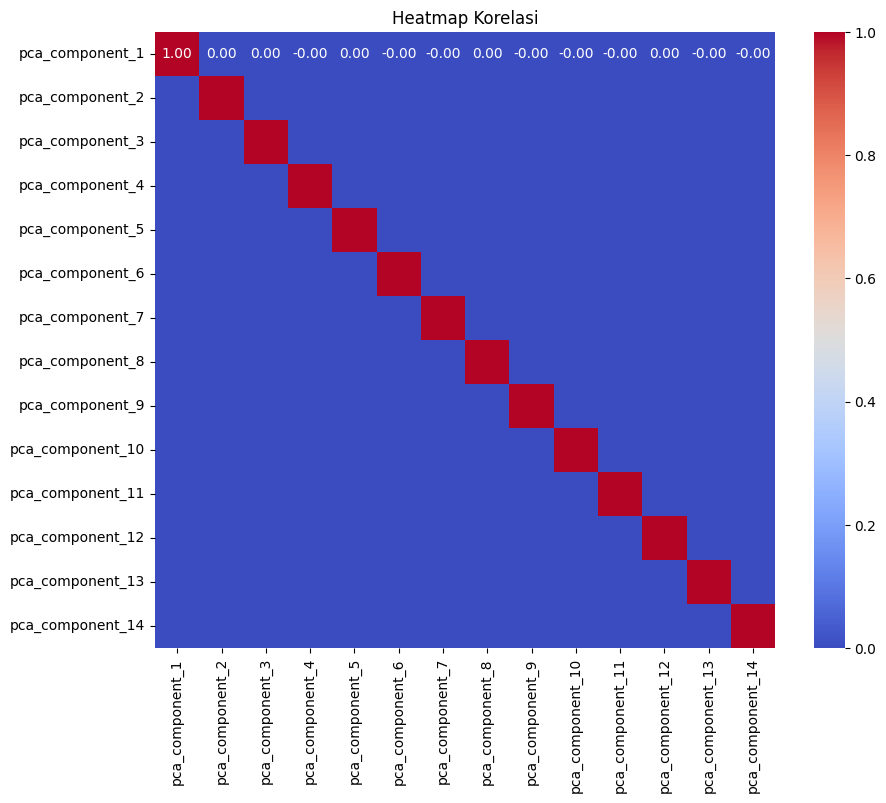

In [18]:
dataset_churn_pca = pd.read_csv('dataset_pca.csv')
dataset_churn_pca.describe()
correlation_matrix = dataset_churn_pca.drop('churn', axis=1).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

### Modelling

In [236]:
x = dataset_klasifikasi.drop('churn', axis=1)
y = dataset_klasifikasi['churn']

In [237]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [238]:
x_trainnorm = normalize(x_train)
x_testnorm = normalize(x_test)

In [115]:
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('CART', DecisionTreeClassifier(max_depth=3, min_samples_split=2)), 
    ('Random Forest', RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_split=2)),
    ('SVM', SVC(kernel='linear', C=2, probability=True)),
    ('Naive Bayes', GaussianNB(var_smoothing=1e-9)),
    ('XGBoost', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3))
]

results = []

for model_name, model in models:
    model.fit(x_trainnorm, y_train)
    y_pred = model.predict(x_testnorm)
    y_prob = model.predict_proba(x_testnorm)[:, 1] 

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, zero_division=1, output_dict=True) #  output_dict=True

    roc_auc = roc_auc_score(y_test, y_prob)

    results.append({'Model': model_name, 'Accuracy': accuracy,
                    'Precision': class_report['macro avg']['precision'],
                    'Recall': class_report['macro avg']['recall'],
                    'F1-Score': class_report['macro avg']['f1-score'],
                    'AUC': roc_auc})
    
    print(f'Klasifikasi dengan {model_name}:')
    print(f'Accuracy: {accuracy}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print(f'Classification Report:\n{class_report}')
    print()

df_results = pd.DataFrame(results)


Klasifikasi dengan Logistic Regression:
Accuracy: 0.684
Confusion Matrix:
[[641  30]
 [286  43]]
Classification Report:
{'0': {'precision': 0.6914778856526429, 'recall': 0.9552906110283159, 'f1-score': 0.802252816020025, 'support': 671.0}, '1': {'precision': 0.589041095890411, 'recall': 0.13069908814589665, 'f1-score': 0.21393034825870647, 'support': 329.0}, 'accuracy': 0.684, 'macro avg': {'precision': 0.6402594907715269, 'recall': 0.5429948495871063, 'f1-score': 0.5080915821393657, 'support': 1000.0}, 'weighted avg': {'precision': 0.6577761818208686, 'recall': 0.684, 'f1-score': 0.6086947241265512, 'support': 1000.0}}

Klasifikasi dengan CART:
Accuracy: 0.745
Confusion Matrix:
[[566 105]
 [150 179]]
Classification Report:
{'0': {'precision': 0.7905027932960894, 'recall': 0.8435171385991058, 'f1-score': 0.8161499639509734, 'support': 671.0}, '1': {'precision': 0.6302816901408451, 'recall': 0.5440729483282675, 'f1-score': 0.5840130505709625, 'support': 329.0}, 'accuracy': 0.745, 'macro

In [146]:
df_results

,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Logistic Regression,0.684,0.640259,0.542995,0.508092,0.683012
1,CART,0.745,0.710392,0.693795,0.700082,0.771350
2,Random Forest,0.738,0.717389,0.645976,0.655218,0.802470
3,SVM,0.671,0.835500,0.500000,0.401556,0.707545
4,Naive Bayes,0.679,0.629532,0.529974,0.481682,0.700649
5,XGBoost,0.756,0.726108,0.696570,0.706115,0.814678


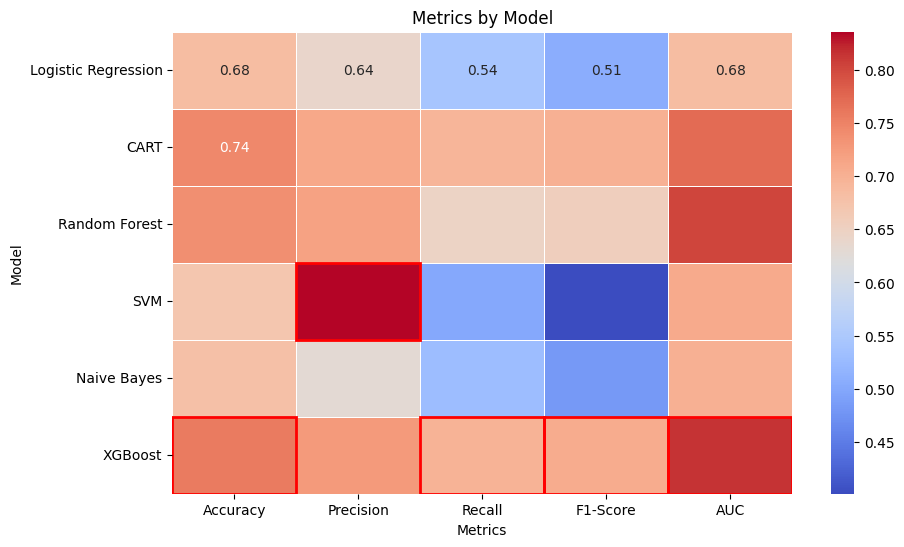

In [150]:
plt.figure(figsize=(10, 6))

# Create a pivot table for the heatmap
heatmap_data = df_results.set_index('Model')

# Find the maximum value in each column (excluding 'Model')
max_values = heatmap_data.max()

# Create a mask to highlight maximum values
mask = heatmap_data == max_values

# Create a heatmap with customized colors for maximum values
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f")

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Model')
plt.title('Metrics by Model')

# Add borders to cells with maximum values
for i in range(len(mask)):
    for j in range(len(mask.columns)):
        if mask.iloc[i, j]:
            plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='red', lw=2))

# Show the heatmap
plt.show()

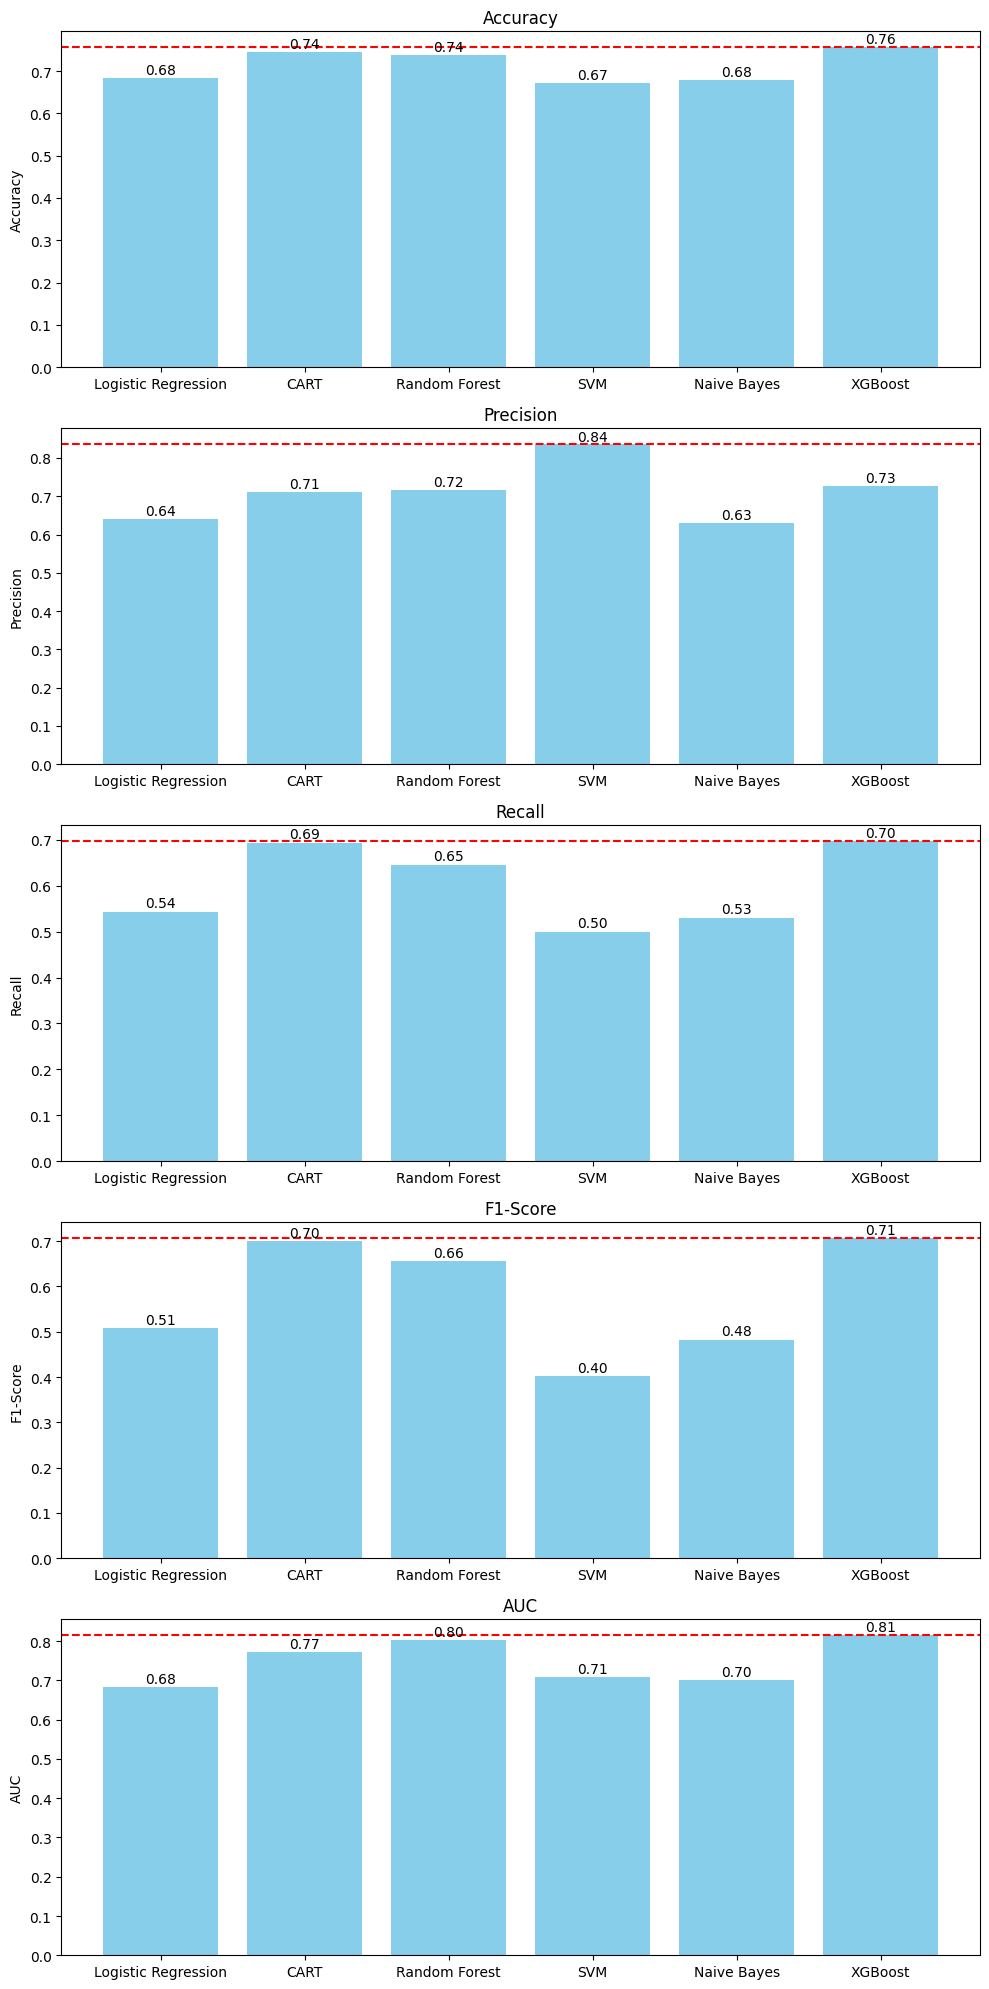

In [125]:
columns_to_visualize = df_results.drop('Model', axis=1).columns

fig, axes = plt.subplots(nrows=len(columns_to_visualize), figsize=(10, 20))
for i, column in enumerate(columns_to_visualize):
    axes[i].bar(model_names, df_results[column], color='skyblue')
    axes[i].set_ylabel(column)
    axes[i].set_title(f'{column}')

    for j, value in enumerate(df_results[column]):
        axes[i].text(j, value + 0.01, f'{value:.2f}', fontsize=10, ha='center')

    axes[i].axhline(df_results[column].max(), color='red', linestyle='--', label=f'Max {column} ({df_results[column].max():.2f})')

plt.tight_layout()
plt.show()


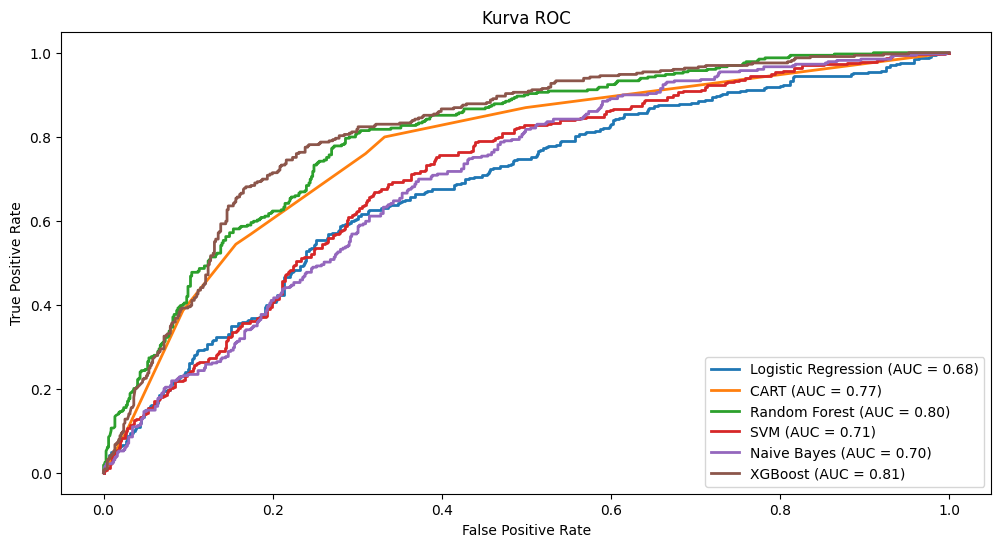

In [124]:
plt.figure(figsize=(12, 6))

for model_name, model in models:
    y_prob = model.predict_proba(x_testnorm)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC')
plt.legend(loc='lower right')
plt.show()

In [16]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Klasifikasi dengan Logistik Regression:")
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Klasifikasi dengan Logistik Regression:
Accuracy: 0.688
Confusion Matrix:
[[656  15]
 [297  32]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.98      0.81       671
           1       0.68      0.10      0.17       329

    accuracy                           0.69      1000
   macro avg       0.68      0.54      0.49      1000
weighted avg       0.69      0.69      0.60      1000



In [183]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_split=2, random_state=42)
rfc.fit(x_trainnorm, y_train)
y_pred_rfc = rfc.predict(x_testnorm)

accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
conf_matrix = confusion_matrix(y_test, y_pred)
report_rfc = classification_report(y_test, y_pred_rfc)
print("\nKlasifikasi dengan Random Forest:")
print(f'Accuracy: {accuracy_rfc}')
print(f'Confusion Matrix:\n{conf_matrix}')  
print(f'Classification Report:\n{report_rfc}')


Klasifikasi dengan Random Forest:
Accuracy: 0.734
Confusion Matrix:
[[584  87]
 [157 172]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.92      0.82       671
           1       0.68      0.36      0.47       329

    accuracy                           0.73      1000
   macro avg       0.71      0.64      0.65      1000
weighted avg       0.72      0.73      0.71      1000



In [18]:
svm = SVC(kernel='linear', C=1)
svm.fit(x_trainnorm, y_train)
y_pred_svm = svm.predict(x_testnorm)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix = confusion_matrix(y_test, y_pred)
report_svm = classification_report(y_test, y_pred_svm, zero_division=1)

print("\nKlasifikasi dengan Support Vector Machine (SVM):")
print(f'Accuracy: {accuracy_svm}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{report_svm}')


Klasifikasi dengan Support Vector Machine (SVM):
Accuracy: 0.671
Confusion Matrix:
[[656  15]
 [297  32]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       671
           1       1.00      0.00      0.00       329

    accuracy                           0.67      1000
   macro avg       0.84      0.50      0.40      1000
weighted avg       0.78      0.67      0.54      1000



In [19]:
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix = confusion_matrix(y_test, y_pred)
report_nb = classification_report(y_test, y_pred_nb)

print("Klasifikasi dengan Naive Bayes:")
print(f'Accuracy: {accuracy_nb}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{report_nb}')

Klasifikasi dengan Naive Bayes:
Accuracy: 0.641
Confusion Matrix:
[[656  15]
 [297  32]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.54      0.67       671
           1       0.47      0.86      0.61       329

    accuracy                           0.64      1000
   macro avg       0.68      0.70      0.64      1000
weighted avg       0.75      0.64      0.65      1000



In [171]:
xgb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix = confusion_matrix(y_test, y_pred)
report_xgb = classification_report(y_test, y_pred_xgb)
print("\nKlasifikasi dengan XGBoost:")
print(f'Accuracy: {accuracy_xgb}')
print(f'Confusion Matrix:\n{conf_matrix}')  
print(f'Classification Report:\n{report_xgb}')


Klasifikasi dengan XGBoost:
Accuracy: 0.764
Confusion Matrix:
[[584  87]
 [157 172]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       671
           1       0.65      0.60      0.63       329

    accuracy                           0.76      1000
   macro avg       0.73      0.72      0.73      1000
weighted avg       0.76      0.76      0.76      1000



In [173]:
feature_importance = rfc.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

              Feature  Importance
3           voice_mou    0.267361
2           voice_trx    0.228392
4           voice_dou    0.140746
6             sms_trx    0.084096
7             sms_dou    0.073944
5             sms_rev    0.052540
12  voice_package_trx    0.045898
11  voice_package_rev    0.036300
1           voice_rev    0.031156
0                 los    0.015205
10      broadband_dou    0.011024
13  voice_package_dou    0.009941
9       broadband_usg    0.001946
8       broadband_rev    0.001450


In [177]:
model = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_split=2, random_state=42)

thresholds = [0.01, 0.02, 0.03, 0.04, 0.05]

def calculate_f1_with_feature_selection(threshold, X, y):
    model = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_split=2, random_state=42)
    sfm = SelectFromModel(model, threshold=threshold)
    sfm.fit(X, y)
    X_selected = sfm.transform(X)

    if X_selected.shape[1] == 0:
        return 0.0
    
    score = np.mean(cross_val_score(model, X_selected, y, cv=5, scoring=make_scorer(f1_score)))
    return score

best_threshold = None
best_f1_score = 0

for threshold in thresholds:
    f1_score_val = calculate_f1_with_feature_selection(threshold, x_train, y_train)
    print(f"Threshold: {threshold}, F1 Score: {f1_score_val}")
    
    if f1_score_val > best_f1_score:
        best_f1_score = f1_score_val
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}, Best F1 Score: {best_f1_score}")


Threshold: 0.01, F1 Score: 0.583057897279631
Threshold: 0.02, F1 Score: 0.5811792810769969
Threshold: 0.03, F1 Score: 0.5801901660880905
Threshold: 0.04, F1 Score: 0.5919074980406649
Threshold: 0.05, F1 Score: 0.5953383616696499
Best Threshold: 0.05, Best F1 Score: 0.5953383616696499


In [239]:
selected_feature_threshold = best_threshold 

model = RandomForestClassifier() 
model.fit(x_trainnorm, y_train)

sfm = SelectFromModel(model, threshold=selected_feature_threshold)
sfm.fit(x_trainnorm, y_train)

selected_features = sfm.get_support(indices=True)

selected_feature_names = x_train.columns[selected_features]
print("Fitur terpilih:")
print(selected_feature_names)

x_train_selected = sfm.transform(x_trainnorm)
x_test_selected = sfm.transform(x_testnorm)


Fitur terpilih:
Index(['los', 'voice_rev', 'voice_trx', 'voice_mou', 'voice_dou', 'sms_rev',
       'sms_trx', 'sms_dou', 'voice_package_rev', 'voice_package_trx',
       'voice_package_dou'],
      dtype='object')


In [242]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_split=2, random_state=42)
rfc.fit(x_train_selected, y_train)
y_pred_rfc = rfc.predict(x_test_selected)

accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
conf_matrix = confusion_matrix(y_test, y_pred_rfc)
report_rfc = classification_report(y_test, y_pred_rfc)

print("\nKlasifikasi dengan Random forest:")
print(f'Accuracy: {accuracy_rfc}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{report_rfc}')


Klasifikasi dengan Random forest:
Accuracy: 0.746
Confusion Matrix:
[[609  62]
 [192 137]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       671
           1       0.69      0.42      0.52       329

    accuracy                           0.75      1000
   macro avg       0.72      0.66      0.67      1000
weighted avg       0.74      0.75      0.73      1000



In [243]:
joblib.dump(rfc, 'random_forest_model.pkl')

['random_forest_model.pkl']

Poin-Poin Penting

Glimpse
Summary
multikolinieritas (pca)
Proporsi churn
Balencing Data
Perbandingan sebaran antara kelas target (Histogram + Boxplot)

Mendapatkan model
split
cross
preprose (feature, normalize, pca)
model
evaluasi (AUC ROC)

prediksi

### Ide Bisnis

Not Yet